## Associative Rule Mining on Paasenger Data from TItanic Ship 

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

The objective of this analysis is to check what category of people were likely to survive. In particular, applying the Association Rule mining to predict which passengers survived from the tragedy.

In [ ]:
#Install Apriori Algorithm
!pip install apyori

In [22]:
#Import Apriori Algorithm.
from apyori import apriori

#Import panda to work with Dataframes.
import pandas as pd

#Import raw python utility codebase
import utils

#Import Matplotlib
import matplotlib.pyplot as plt

In [2]:
#Import Titanic Dataset
titanicData = pd.read_csv('titanic_preprocessed.csv')
titanicData

,Age_Adult,Age_Child,Sex_Female,Sex_Male,Survived,Crew_Member,First_class,Second_class,Third_class
0,Yes,No,Yes,No,No,Yes,No,No,No
1,Yes,No,Yes,No,No,Yes,No,No,No
2,Yes,No,Yes,No,No,Yes,No,No,No
3,Yes,No,Yes,No,Yes,Yes,No,No,No
4,Yes,No,Yes,No,Yes,Yes,No,No,No
...,...,...,...,...,...,...,...,...,...
2196,Yes,No,No,Yes,Yes,No,No,No,Yes
2197,Yes,No,No,Yes,Yes,No,No,No,Yes
2198,Yes,No,No,Yes,Yes,No,No,No,Yes
2199,Yes,No,No,Yes,Yes,No,No,No,Yes


The Dataset above provides specific attributes; Age, Gender, Survival, Crew and Passenger Status, for  all the passengers aboard the Titanic. 

In [21]:
titanicData.describe()

,Age_Adult,Age_Child,Sex_Female,Sex_Male,Survived,Crew_Member,First_class,Second_class,Third_class
count,2201,2201,2201,2201,2201,2201,2201,2201,2201
unique,2,2,2,2,2,2,2,2,2
top,Yes,No,No,Yes,No,No,No,No,No
freq,2092,2092,1731,1731,1490,1316,1876,1916,1495


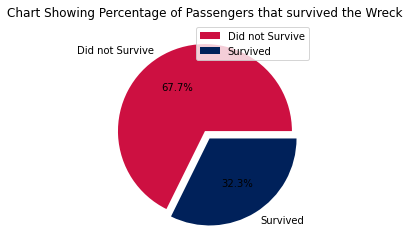

In [36]:
Survival_List = titanicData.Survived.value_counts()
Survival_List

plt.pie(Survival_List, labels = ["Did not Survive", "Survived"], 
        explode=[0.0, 0.1], 
        colors = ['#cd1041', '#00215a'],
        autopct='%1.1f%%'
       )
plt.title('Chart Showing Percentage of Passengers that survived the Wreck')
plt.legend()
plt.show()


In [3]:
#Convert Dataset to List of Lists to prep for Apriori Algorithm
titanicDataList = []
data_col = titanicData.columns.tolist() # return all columns of the data set into a List

#Iterate through each row of the titanic and input appropraite columns as lists for each casualty
for casualty_row in titanicData.iterrows(): 
    casualty_details = [] 
    for col_details in data_col: 
        if casualty_row[1][col_details] == 'Yes':
            casualty_details.append(col_details)
    titanicDataList.append(casualty_details)
    
titanicDataList

[['Age_Adult', 'Sex_Female', 'Crew_Member'],
 ['Age_Adult', 'Sex_Female', 'Crew_Member'],
 ['Age_Adult', 'Sex_Female', 'Crew_Member'],
 ['Age_Adult', 'Sex_Female', 'Survived', 'Crew_Member'],
 ['Age_Adult', 'Sex_Female', 'Survived', 'Crew_Member'],
 ['Age_Adult', 'Sex_Female', 'Survived', 'Crew_Member'],
 ['Age_Adult', 'Sex_Female', 'Survived', 'Crew_Member'],
 ['Age_Adult', 'Sex_Female', 'Survived', 'Crew_Member'],
 ['Age_Adult', 'Sex_Female', 'Survived', 'Crew_Member'],
 ['Age_Adult', 'Sex_Female', 'Survived', 'Crew_Member'],
 ['Age_Adult', 'Sex_Female', 'Survived', 'Crew_Member'],
 ['Age_Adult', 'Sex_Female', 'Survived', 'Crew_Member'],
 ['Age_Adult', 'Sex_Female', 'Survived', 'Crew_Member'],
 ['Age_Adult', 'Sex_Female', 'Survived', 'Crew_Member'],
 ['Age_Adult', 'Sex_Female', 'Survived', 'Crew_Member'],
 ['Age_Adult', 'Sex_Female', 'Survived', 'Crew_Member'],
 ['Age_Adult', 'Sex_Female', 'Survived', 'Crew_Member'],
 ['Age_Adult', 'Sex_Female', 'Survived', 'Crew_Member'],
 ['Age_Adu

In [19]:
#Create Association rules, taking the minimun support as 0.05 and Confidence as 0.5
#Applying Apriori Algorithm
titanicData_Rules = list(apriori(titanicDataList, min_support = 0.1, min_confidence = 0.6))

#Use stored extract functon in utils to extract  Rules and fit in a Dataframe
extracted_titanicData_Rules = utils.extract(titanicData_Rules)
# OR extracted_titanicData_Rules = utils.extract(titanicData_Rules, , 'Survived', 2) to filter on survived
extracted_titanicData_Rules = pd.DataFrame(extracted_titanicData_Rules, 
                                           columns=['Antecedent', 
                                                    'Consequent', 
                                                    'Support', 
                                                    'Confidence', 
                                                    'Lift']
                                          )

extracted_titanicData_Rules


,Antecedent,Consequent,Support,Confidence,Lift
0,[],[Age_Adult],0.950477,0.950477,1.000000
1,[],[Sex_Male],0.786461,0.786461,1.000000
2,[Crew_Member],[Age_Adult],0.402090,1.000000,1.052103
3,[First_class],[Age_Adult],0.144934,0.981538,1.032680
4,[Second_class],[Age_Adult],0.118582,0.915789,0.963505
5,[Sex_Female],[Age_Adult],0.193094,0.904255,0.951370
6,[],"[Age_Adult, Sex_Male]",0.757383,0.757383,1.000000
7,[Age_Adult],[Sex_Male],0.757383,0.796845,1.013204
8,[Sex_Male],[Age_Adult],0.757383,0.963027,1.013204
9,[Survived],[Age_Adult],0.297138,0.919831,0.967757


A Minimum support of 0.1 was applied in the Algorith on the basis that at least 10% of the passengers support the associative rules. In addition, at least 60% of the consequent should be found to be true when the antecedent is true ergo a minimum confidence of 0.6. 

Twenty Four (24) Associative rules generated met the minimum support and confidence set. 

In [42]:
!pip install plotly==5.10.0



In [45]:
import plotly.express as px

rules_scatter_chart = px.scatter(extracted_titanicData_Rules, 
                                 x = 'Support', 
                                 y = 'Confidence', 
                                 color = 'Lift',
                                 color_continuous_scale= "agsunset",
                                 hover_data = ['Antecedent', 'Consequent']
                                )

rules_scatter_chart.show()

In [20]:
#Filter on rules with 'Survived' as consequent
extracted_titanicData_Rules[extracted_titanicData_Rules['Consequent'].apply(lambda x: 'Survived' in x)]

,Antecedent,Consequent,Support,Confidence,Lift
12,[Sex_Female],[Survived],0.156293,0.731915,2.265745
17,[Sex_Female],"[Survived, Age_Adult]",0.143571,0.672340,2.262724
18,"[Sex_Female, Age_Adult]",[Survived],0.143571,0.743529,2.301699


Three Associative rules were filtered out to show relationships between passengers that survived the wreck and specific attributes. Hence, displaying for possible 'Antecedents' for the 'Survival' Consequent.

Each of these rules can be seen to be Interesting rules as they have positively correlated Lift values i.e. Lifts > 1.

It can be inferred that if a Passenger were female then they had a high chance of surviving the wreck as well as the survived female being a adult female.  Also, If a passenger was a Adult female then they had a high chance of surviving the Ship Wreck.

This insight can be related to the fact that during the Wreck, Women and Children were treated with high priority and were most likely evacuated first. 
However, the rules do not indicate any strong relationship with children, female nor male. This can be the effect of factors such as inept survival skills or instinct in kids, detachment from parents and guardians during the turmoil and Children being less resistant to the adverse conditions during the Wreck such as the cold. 

The three rules above corrobate these obvious insights and do not provide any new insights. Hence, they are Trivial Rules. Actionable Rules and Inexplicable Rules were not spotted among the Three Associative Rules.  